In [2]:
# For data manipulation

import pandas as pd

import numpy as np 

# machine learning classification

from sklearn.svm import SVC

from sklearn.metrics import scorer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import defaultdict

# To plot
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn

# To fetch data

from pandas_datareader import data as pdr


In [3]:
import glob
import pandas as pd
pattern='*.csv'
hong = glob.glob(pattern)
len(hong)

62

In [3]:
hong

['AAC Technologies Holdings Inc. (2018.HK).csv',
 'AIA Group Limited (1299.HK).csv',
 'BOC Hong Kong (Holdings) Limited (2388.HK).csv',
 'China Life Insurance Company Limited (2628.HK).csv',
 'China Mengniu Dairy Company Limited (2319.HK).csv',
 'China Mobile Limited (0941.HK).csv',
 'China Petroleum & Chemical Corporation(0386.HK).csv',
 'China Resources Land Limited (1109.HK).csv',
 'China Resources Power Holdings Company Limited (0836.HK).csv',
 'CITIC Limited (0267.HK).csv',
 'CK Infrastructure Holdings Limited (1038.HK).csv',
 'CLP Holdings Limited (0002.HK).csv',
 'CNOOC Limited (0883.HK).csv',
 'Galaxy Entertainment Group Limited (0027.HK).csv',
 'Hang Lung Properties Limited (0101.HK).csv',
 'Henderson Land Development Company Limited (0012.HK).csv',
 'Hengan International Group Company Limited (1044.HK).csv',
 'Industrial and Commercial Bank of China Limited (1398.HK).csv',
 'Lenovo Group Limited (0992.HK).csv',
 'New World Development Company Limited (0017.HK).csv',
 'Ping An

In [3]:
hkong = pd.read_csv(hong[0])
hkong = hkong.drop('Adj Close', axis=1)
hkong.columns = ['Date', 'Open' + '_'+str(0), 'High'+'_'+str(0), 'Low' +'_'+str(0), 'Close'+ '_'+str(0), 'Volume'+ '_'+ str(0)]

for date in hkong['Date']:
    hkong['Date'] = pd.to_datetime(hkong['Date'])
hkong =hkong.sort_values(by='Date')

hkong['Volume'+ '_'+ str(0)] = hkong['Volume'+ '_'+ str(0)].fillna(0)
for col in hkong:
    hkong[col] = hkong[col].fillna(method='ffill')
    
#hkong['Target'] = np.where(hkong['Close'].shift(-1) > hkong['Close'],int(1),int(-1))
hkong.shape

(1234, 6)

In [4]:
hkong['Open' + '_'+str(0)] = ((hkong['Open' + '_'+str(0)] - hkong['Open' + '_'+str(0)].shift(1))/hkong['Open' + '_'+str(0)].shift(1)) *100

hkong['High' + '_'+str(0)] = ((hkong['High' + '_'+str(0)] - hkong['High' + '_'+str(0)].shift(1))/hkong['High' + '_'+str(0)].shift(1)) *100

hkong['Low' + '_'+str(0)] = ((hkong['Low' + '_'+str(0)] - hkong['Low' + '_'+str(0)].shift(1))/hkong['Low' + '_'+str(0)].shift(1)) *100

hkong['Close' + '_'+str(0)] = ((hkong['Close' + '_'+str(0)] - hkong['Close' + '_'+str(0)].shift(1))/hkong['Close' + '_'+str(0)].shift(1)) *100

hkong = hkong.drop(0, axis=0)


print hkong.shape
hkong.head()

#hkong['Open' + '_'+str(0)] = hkong['Open' + '_'+str(0)].drop(hkong['Open' + '_'+str(0)].index[0])


(1233, 6)


,Date,Open_0,High_0,Low_0,Close_0,Volume_0
1,2013-03-12,-0.776397,-0.613485,0.315451,0.469474,1597412
2,2013-03-13,-0.469490,-0.925938,-2.830186,-3.115259,2922548
3,2013-03-14,-3.930818,-2.336443,-1.294498,-0.321543,2704634
4,2013-03-15,3.600658,1.754386,1.147541,-0.161287,3487274
5,2013-03-18,-2.843602,-2.351097,-1.620746,0.646200,2427267


In [5]:
#run only once
for i in range(1,len(hong)):
    df = pd.read_csv(hong[i]) 
    
    if 'Adj Close' in df:
        df = df.drop('Adj Close', axis=1) 
    
    df.columns = ['Date', 'Open' + '_'+str(i), 'High'+'_'+str(i), 'Low' +'_'+str(i), 'Close'+'_'+str(i), 'Volume'+'_'+str(i)]
    
    #formatting date
    for date in df['Date']:
        df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')
    
    #imputing missing values
    df['Volume'+ '_'+ str(i)] = df['Volume'+ '_'+ str(i)].fillna(0)
    for col in df:
        df[col] = df[col].fillna(method='ffill')
    df['Open' + '_'+str(i)] = ((df['Open' + '_'+str(i)] - df['Open' + '_'+str(i)].shift(1))/df['Open' + '_'+str(i)].shift(1)) *100

    df['High' + '_'+str(i)] = ((df['High' + '_'+str(i)] - df['High' + '_'+str(i)].shift(1))/df['High' + '_'+str(i)].shift(1)) *100

    df['Low' + '_'+str(i)] = ((df['Low' + '_'+str(i)] - df['Low' + '_'+str(i)].shift(1))/df['Low' + '_'+str(i)].shift(1)) *100

    df['Close' + '_'+str(i)] = ((df['Close' + '_'+str(i)] - df['Close' + '_'+str(i)].shift(1))/df['Close' + '_'+str(i)].shift(1)) *100

    df = df.drop(0, axis=0)
    
    hkong = pd.merge(hkong, df, how='outer', on='Date')

hkong.shape


(1555, 311)

In [6]:
#hkong.to_csv('E:/hkongpercent-1_missing.csv')  ---->not needed

In [6]:

for date in hkong['Date']:
    hkong['Date'] = pd.to_datetime(hkong['Date'])
hkong =hkong.sort_values(by='Date')

In [7]:
hkong.head()

,Date,Open_0,High_0,Low_0,Close_0,Volume_0,Open_1,High_1,Low_1,Close_1,...,Open_60,High_60,Low_60,Close_60,Volume_60,Open_61,High_61,Low_61,Close_61,Volume_61
1233,2013-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2013-03-12,-0.776397,-0.613485,0.315451,0.469474,1597412.0,1.754380,0.143882,0.441182,-0.436673,...,-0.238700,0.531070,-1.382659,-1.038177,117600.0,0.213418,-0.321168,-0.190709,-0.547478,2738000.0
1,2013-03-13,-0.469490,-0.925938,-2.830186,-3.115259,2922548.0,-0.574716,-0.574716,-1.903373,-0.877190,...,-1.168739,-2.012475,-0.511300,-0.989981,91000.0,-0.250032,-0.194338,-0.302631,0.010004,2224400.0
2,2013-03-14,-3.930818,-2.336443,-1.294498,-0.321543,2704634.0,-1.589593,-1.589593,0.149251,0.294979,...,-1.156576,-0.442113,0.002709,0.278674,80200.0,-0.205514,-0.557313,-0.202575,-0.547182,2150200.0
3,2013-03-15,3.600658,1.754386,1.147541,-0.161287,3487274.0,1.321589,2.349483,1.639341,1.470588,...,0.600239,1.575284,-0.146681,0.357832,116400.0,-0.159327,-0.034864,-0.268680,-0.305210,2530400.0


In [8]:
for i in range(0,len(hong)):
    hkong['Volume'+ '_'+ str(i)] = hkong['Volume'+ '_'+ str(i)].fillna(0)
for col in hkong.columns:
    hkong[col] = hkong[col].fillna(method='ffill')
hkong.head()

,Date,Open_0,High_0,Low_0,Close_0,Volume_0,Open_1,High_1,Low_1,Close_1,...,Open_60,High_60,Low_60,Close_60,Volume_60,Open_61,High_61,Low_61,Close_61,Volume_61
1233,2013-03-11,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
0,2013-03-12,-0.776397,-0.613485,0.315451,0.469474,1597412.0,1.754380,0.143882,0.441182,-0.436673,...,-0.238700,0.531070,-1.382659,-1.038177,117600.0,0.213418,-0.321168,-0.190709,-0.547478,2738000.0
1,2013-03-13,-0.469490,-0.925938,-2.830186,-3.115259,2922548.0,-0.574716,-0.574716,-1.903373,-0.877190,...,-1.168739,-2.012475,-0.511300,-0.989981,91000.0,-0.250032,-0.194338,-0.302631,0.010004,2224400.0
2,2013-03-14,-3.930818,-2.336443,-1.294498,-0.321543,2704634.0,-1.589593,-1.589593,0.149251,0.294979,...,-1.156576,-0.442113,0.002709,0.278674,80200.0,-0.205514,-0.557313,-0.202575,-0.547182,2150200.0
3,2013-03-15,3.600658,1.754386,1.147541,-0.161287,3487274.0,1.321589,2.349483,1.639341,1.470588,...,0.600239,1.575284,-0.146681,0.357832,116400.0,-0.159327,-0.034864,-0.268680,-0.305210,2530400.0


In [9]:

hkong = hkong.fillna(0)

In [10]:
hkong.head()

,Date,Open_0,High_0,Low_0,Close_0,Volume_0,Open_1,High_1,Low_1,Close_1,...,Open_60,High_60,Low_60,Close_60,Volume_60,Open_61,High_61,Low_61,Close_61,Volume_61
1233,2013-03-11,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
0,2013-03-12,-0.776397,-0.613485,0.315451,0.469474,1597412.0,1.754380,0.143882,0.441182,-0.436673,...,-0.238700,0.531070,-1.382659,-1.038177,117600.0,0.213418,-0.321168,-0.190709,-0.547478,2738000.0
1,2013-03-13,-0.469490,-0.925938,-2.830186,-3.115259,2922548.0,-0.574716,-0.574716,-1.903373,-0.877190,...,-1.168739,-2.012475,-0.511300,-0.989981,91000.0,-0.250032,-0.194338,-0.302631,0.010004,2224400.0
2,2013-03-14,-3.930818,-2.336443,-1.294498,-0.321543,2704634.0,-1.589593,-1.589593,0.149251,0.294979,...,-1.156576,-0.442113,0.002709,0.278674,80200.0,-0.205514,-0.557313,-0.202575,-0.547182,2150200.0
3,2013-03-15,3.600658,1.754386,1.147541,-0.161287,3487274.0,1.321589,2.349483,1.639341,1.470588,...,0.600239,1.575284,-0.146681,0.357832,116400.0,-0.159327,-0.034864,-0.268680,-0.305210,2530400.0


In [11]:
hkong.isnull().sum()[hkong.isnull().sum() !=0]

Series([], dtype: int64)

In [12]:
for i in range(30):
    hkong['Target'+'_'+str(i)] = np.where(hkong['Close'+'_'+str(i)]>0.5,1,0)
    
hkong.shape

(1555, 341)

In [13]:
hkong.head()

,Date,Open_0,High_0,Low_0,Close_0,Volume_0,Open_1,High_1,Low_1,Close_1,...,Target_20,Target_21,Target_22,Target_23,Target_24,Target_25,Target_26,Target_27,Target_28,Target_29
1233,2013-03-11,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
0,2013-03-12,-0.776397,-0.613485,0.315451,0.469474,1597412.0,1.754380,0.143882,0.441182,-0.436673,...,0,0,0,1,0,0,0,0,0,0
1,2013-03-13,-0.469490,-0.925938,-2.830186,-3.115259,2922548.0,-0.574716,-0.574716,-1.903373,-0.877190,...,0,0,0,0,0,0,0,0,0,0
2,2013-03-14,-3.930818,-2.336443,-1.294498,-0.321543,2704634.0,-1.589593,-1.589593,0.149251,0.294979,...,0,1,0,0,0,0,1,1,0,0
3,2013-03-15,3.600658,1.754386,1.147541,-0.161287,3487274.0,1.321589,2.349483,1.639341,1.470588,...,0,0,0,0,0,0,0,0,0,0


In [14]:
hkong.index = hkong.Date
hkong = hkong.drop('Date', axis=1)
hkong.shape

(1555, 340)

In [15]:
hkong.head()

,Open_0,High_0,Low_0,Close_0,Volume_0,Open_1,High_1,Low_1,Close_1,Volume_1,...,Target_20,Target_21,Target_22,Target_23,Target_24,Target_25,Target_26,Target_27,Target_28,Target_29
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-11,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2013-03-12,-0.776397,-0.613485,0.315451,0.469474,1597412.0,1.754380,0.143882,0.441182,-0.436673,23618156.0,...,0,0,0,1,0,0,0,0,0,0
2013-03-13,-0.469490,-0.925938,-2.830186,-3.115259,2922548.0,-0.574716,-0.574716,-1.903373,-0.877190,31644955.0,...,0,0,0,0,0,0,0,0,0,0
2013-03-14,-3.930818,-2.336443,-1.294498,-0.321543,2704634.0,-1.589593,-1.589593,0.149251,0.294979,21286152.0,...,0,1,0,0,0,0,1,1,0,0
2013-03-15,3.600658,1.754386,1.147541,-0.161287,3487274.0,1.321589,2.349483,1.639341,1.470588,44707880.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
hkong.to_csv('E:/hkongpercent-1_ord_currency.csv')

In [5]:
#whenever open fresh, start from here
hkong = pd.read_csv('E:/hangseng/hkongpercent-1_ord_currency.csv')   
print hkong.shape
hkong.head()

(1555, 341)


,Date,Open_0,High_0,Low_0,Close_0,Volume_0,Open_1,High_1,Low_1,Close_1,...,Target_20,Target_21,Target_22,Target_23,Target_24,Target_25,Target_26,Target_27,Target_28,Target_29
0,3/11/2013,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,3/12/2013,-0.776397,-0.613485,0.315451,0.469474,1597412,1.754380,0.143882,0.441182,-0.436673,...,0,0,0,1,0,0,0,0,0,0
2,3/13/2013,-0.469490,-0.925938,-2.830186,-3.115259,2922548,-0.574716,-0.574716,-1.903373,-0.877190,...,0,0,0,0,0,0,0,0,0,0
3,3/14/2013,-3.930818,-2.336443,-1.294498,-0.321543,2704634,-1.589593,-1.589593,0.149251,0.294979,...,0,1,0,0,0,0,1,1,0,0
4,3/15/2013,3.600658,1.754386,1.147541,-0.161287,3487274,1.321589,2.349483,1.639341,1.470588,...,0,0,0,0,0,0,0,0,0,0


In [6]:
hkong.index = hkong.Date
hkong = hkong.drop('Date', axis=1)
hkong.shape

(1555, 340)

In [7]:
hkong.head()

,Open_0,High_0,Low_0,Close_0,Volume_0,Open_1,High_1,Low_1,Close_1,Volume_1,...,Target_20,Target_21,Target_22,Target_23,Target_24,Target_25,Target_26,Target_27,Target_28,Target_29
Date,,,,,,,,,,,,,,,,,,,,,
3/11/2013,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
3/12/2013,-0.776397,-0.613485,0.315451,0.469474,1597412,1.754380,0.143882,0.441182,-0.436673,23618156,...,0,0,0,1,0,0,0,0,0,0
3/13/2013,-0.469490,-0.925938,-2.830186,-3.115259,2922548,-0.574716,-0.574716,-1.903373,-0.877190,31644955,...,0,0,0,0,0,0,0,0,0,0
3/14/2013,-3.930818,-2.336443,-1.294498,-0.321543,2704634,-1.589593,-1.589593,0.149251,0.294979,21286152,...,0,1,0,0,0,0,1,1,0,0
3/15/2013,3.600658,1.754386,1.147541,-0.161287,3487274,1.321589,2.349483,1.639341,1.470588,44707880,...,0,0,0,0,0,0,0,0,0,0


In [18]:
target=hkong.iloc[:, 310:].columns
target

Index([u'Target_0', u'Target_1', u'Target_2', u'Target_3', u'Target_4',
       u'Target_5', u'Target_6', u'Target_7', u'Target_8', u'Target_9',
       u'Target_10', u'Target_11', u'Target_12', u'Target_13', u'Target_14',
       u'Target_15', u'Target_16', u'Target_17', u'Target_18', u'Target_19',
       u'Target_20', u'Target_21', u'Target_22', u'Target_23', u'Target_24',
       u'Target_25', u'Target_26', u'Target_27', u'Target_28', u'Target_29'],
      dtype='object')

In [37]:
col = []

for i in range(len(hong)):
    col.append('Close'+'_'+str(i))
Xdf = hkong.loc[:, col]
sc=StandardScaler()
sc.fit(Xdf)
X=sc.transform(Xdf)

In [13]:
kmeans = KMeans(15)

In [38]:
kmeans.fit(X.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
cluster_groups = kmeans.predict(X.T)

set(cluster_groups)
print(cluster_groups)
print(list(zip(cluster_groups, Xdf.columns)))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 2 2 2
 0 2 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2 2 2 2 1 2 2 1 1]
[(1, 'Close_0'), (1, 'Close_1'), (1, 'Close_2'), (1, 'Close_3'), (1, 'Close_4'), (1, 'Close_5'), (1, 'Close_6'), (1, 'Close_7'), (1, 'Close_8'), (1, 'Close_9'), (1, 'Close_10'), (1, 'Close_11'), (1, 'Close_12'), (1, 'Close_13'), (1, 'Close_14'), (1, 'Close_15'), (1, 'Close_16'), (1, 'Close_17'), (1, 'Close_18'), (1, 'Close_19'), (1, 'Close_20'), (1, 'Close_21'), (1, 'Close_22'), (1, 'Close_23'), (1, 'Close_24'), (1, 'Close_25'), (1, 'Close_26'), (1, 'Close_27'), (1, 'Close_28'), (1, 'Close_29'), (0, 'Close_30'), (0, 'Close_31'), (0, 'Close_32'), (0, 'Close_33'), (2, 'Close_34'), (2, 'Close_35'), (2, 'Close_36'), (0, 'Close_37'), (2, 'Close_38'), (2, 'Close_39'), (2, 'Close_40'), (2, 'Close_41'), (1, 'Close_42'), (2, 'Close_43'), (2, 'Close_44'), (2, 'Close_45'), (1, 'Close_46'), (1, 'Close_47'), (2, 'Close_48'), (2, 'Close_49'), (2, 'Close_50'), (1, 'Close_51')

In [40]:
sector = defaultdict(list)
for a, b in zip(cluster_groups, Xdf.columns):
       sector[a].append(b)
#sector

In [42]:
n_clusters = 3
kmeans = KMeans(n_clusters, n_init=20, max_iter=1000)
kmeans.fit(X)
date_groups = kmeans.fit_predict(X)
date_groups = pd.Series(date_groups, index=Xdf.index)
date_groups.head(20)

Date
3/11/2013    1
3/12/2013    1
3/13/2013    0
3/14/2013    1
3/15/2013    0
3/17/2013    0
3/18/2013    0
3/19/2013    1
3/20/2013    2
3/21/2013    1
3/22/2013    1
3/24/2013    1
3/25/2013    1
3/26/2013    2
3/27/2013    1
3/28/2013    1
3/29/2013    1
4/1/2013     1
4/2/2013     1
4/3/2013     0
dtype: int32

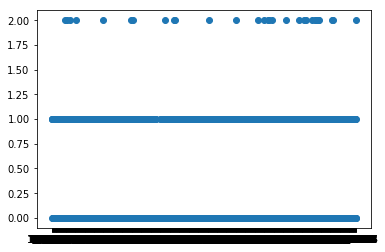

In [22]:
plt.plot(date_groups.index, date_groups.values, 'o')

In [33]:
centers = kmeans.cluster_centers_
#centers

In [45]:
from scipy.spatial import distance 
cos_dist = distance.cdist(centers,centers, 'cosine')
print(cos_dist)

[[0.00000000e+00 1.98943935e+00 1.95422497e+00]
 [1.98943935e+00 1.11022302e-16 3.10242420e-02]
 [1.95422497e+00 3.10242420e-02 0.00000000e+00]]


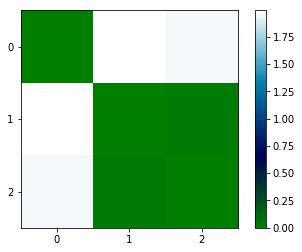

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(cos_dist, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.xticks(range(0,n_clusters))
plt.yticks(range(0,n_clusters))
plt.show()

In [47]:
indicies = np.unravel_index(cos_dist.argmax(), cos_dist.shape)
indicies

(0, 1)

In [48]:
#centers[indices[0]]
centers[0]

array([ 3.97550988e-01,  4.26841197e-01,  3.41836996e-01,  5.52012592e-01,
        3.52079538e-01,  2.33593828e-01,  4.61119082e-01,  6.16287356e-01,
        3.28748175e-01,  3.43925672e-01,  1.41099672e-01,  1.78661819e-01,
        4.46449291e-01,  6.47886016e-01,  3.29445905e-01,  3.67784231e-01,
        1.98013401e-01,  4.29648545e-01,  1.66860718e-01,  3.78584720e-01,
        5.94206018e-01,  2.13916936e-01,  5.07659611e-01,  4.18680510e-01,
        3.29293053e-01,  6.21788286e-01,  3.46813614e-01,  2.07167919e-01,
        2.89023065e-01, -1.92773457e-03,  6.06744183e-02, -3.36659387e-02,
       -2.05536079e-03, -1.23668557e-03,  2.01226112e-01,  3.74120042e-01,
        4.47631856e-01, -4.37202265e+00,  4.37355954e-01,  4.00690599e-01,
        4.57849562e-01,  4.20396814e-01,  3.75522441e-01,  4.80890112e-01,
        2.73510940e-01,  2.29661519e-01,  1.32151571e-01,  1.60497905e-01,
        7.60221968e-01,  2.68585371e-01,  5.19178474e-01,  3.04574576e-01,
        2.63802124e-01,  

In [49]:
#centers[indices[0]]
centers[1]

array([-1.68397377e-01, -3.30844517e-01, -2.95018485e-01, -6.60014857e-01,
       -1.88630138e-01, -3.40486666e-01, -5.13279430e-01, -5.92957042e-01,
       -5.03245618e-01, -4.26286566e-01, -6.70291872e-02, -1.80788111e-01,
       -4.78391100e-01, -4.86185948e-01, -4.64150954e-01, -3.40616923e-01,
       -1.87572877e-01, -4.52729130e-01, -2.99231235e-01, -4.35885705e-01,
       -5.02940952e-01, -2.18952084e-01, -4.92387480e-01, -4.24070479e-01,
       -3.14947801e-01, -3.21323035e-01, -3.29634969e-01, -2.38755814e-01,
       -2.30168486e-01,  6.91353361e-03, -1.25839128e-01,  1.68185723e-02,
       -2.28295523e-02,  2.81923298e-03, -1.93569037e-01, -3.77393201e-01,
       -4.79905653e-01,  4.86622883e+00, -4.61088096e-01, -3.61273476e-01,
       -4.99695959e-01, -4.38342035e-01, -3.76333623e-01, -4.95859512e-01,
       -2.96574693e-01, -2.00161337e-01, -7.15259301e-02, -1.39285786e-01,
       -4.33221659e-01, -2.46186420e-01, -4.44384152e-01, -2.28912028e-01,
       -2.14178184e-01, -

In [43]:

kmeans.fit(X)
cluster_groups = kmeans.predict(X)

set(cluster_groups)
print(cluster_groups)
print(list(zip(cluster_groups, Xdf.columns)))

[1 1 0 ... 2 1 2]
[(1, 'Close_0'), (1, 'Close_1'), (0, 'Close_2'), (1, 'Close_3'), (0, 'Close_4'), (0, 'Close_5'), (0, 'Close_6'), (1, 'Close_7'), (2, 'Close_8'), (1, 'Close_9'), (1, 'Close_10'), (1, 'Close_11'), (1, 'Close_12'), (2, 'Close_13'), (1, 'Close_14'), (1, 'Close_15'), (1, 'Close_16'), (1, 'Close_17'), (1, 'Close_18'), (0, 'Close_19'), (1, 'Close_20'), (0, 'Close_21'), (0, 'Close_22'), (1, 'Close_23'), (2, 'Close_24'), (2, 'Close_25'), (1, 'Close_26'), (1, 'Close_27'), (1, 'Close_28'), (0, 'Close_29'), (1, 'Close_30'), (0, 'Close_31'), (1, 'Close_32'), (2, 'Close_33'), (2, 'Close_34'), (1, 'Close_35'), (1, 'Close_36'), (2, 'Close_37'), (2, 'Close_38'), (1, 'Close_39'), (1, 'Close_40'), (1, 'Close_41'), (2, 'Close_42'), (1, 'Close_43'), (1, 'Close_44'), (2, 'Close_45'), (2, 'Close_46'), (2, 'Close_47'), (2, 'Close_48'), (2, 'Close_49'), (1, 'Close_50'), (1, 'Close_51'), (1, 'Close_52'), (0, 'Close_53'), (1, 'Close_54'), (1, 'Close_55'), (1, 'Close_56'), (1, 'Close_57'), (1, '

In [44]:
sector = defaultdict(list)
for a, b in zip(cluster_groups, Xdf.columns):
       sector[a].append(b)
sector

defaultdict(list,
            {0: ['Close_2',
              'Close_4',
              'Close_5',
              'Close_6',
              'Close_19',
              'Close_21',
              'Close_22',
              'Close_29',
              'Close_31',
              'Close_53'],
             1: ['Close_0',
              'Close_1',
              'Close_3',
              'Close_7',
              'Close_9',
              'Close_10',
              'Close_11',
              'Close_12',
              'Close_14',
              'Close_15',
              'Close_16',
              'Close_17',
              'Close_18',
              'Close_20',
              'Close_23',
              'Close_26',
              'Close_27',
              'Close_28',
              'Close_30',
              'Close_32',
              'Close_35',
              'Close_36',
              'Close_39',
              'Close_40',
              'Close_41',
              'Close_43',
              'Close_44',
              'Close_5